# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, April 16, 2018

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## 1. Data

In [2]:
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

## 2. PCA - Principal Components Analysis

In [3]:
tfidf_vectorizer = TfidfVectorizer(min_df=30)
X = tfidf_vectorizer.fit_transform(newsgroups_train.data)
y = newsgroups_train.target

In [4]:
X = X.toarray()

# normalize function to normalize the data
def normalize(data):
    mean = np.mean(data, axis=1)[:,None]
    return data - mean

# we normalize the data, this wasn't specified in the question
# but we do it for better results
X = normalize(X)

In [5]:
# <DONE> import proper class
from sklearn.decomposition import PCA

# <DONE> uncomment below. Choose q
# We choose q = 4 because this lead to the best groupings of
# topics, varying q to increase it leads to some non-sensical
# topics arising and lowering q leads to loss of information,
# furthermore the var_ratios becomes trivially small after
# q = 4.
q = 4

# <DONE> uncomment below. initialize PCA model
# NOTE: The other options/hyperparameters are set to sklearn
# defaults for PCA.
pca = PCA(n_components=q)

# <DONE> uncomment below. train PCA model and retrieve the low-dimension projection of X.
pca.fit(X)
Z = pca.transform(X)

# <DONE> uncomment below. retrieve explained variance ratio
var_ratio = pca.explained_variance_ratio_

In [6]:
print ('Ratio of variance explained: ', var_ratio)

Ratio of variance explained:  [0.02923227 0.01716945 0.01157074 0.00990713]


In [7]:
print ('Original Shape: ', X.shape)
print ('Reduced Shape: ', Z.shape)

Original Shape:  (2369, 1771)
Reduced Shape:  (2369, 4)


## 3. Visualizing the reduced data points

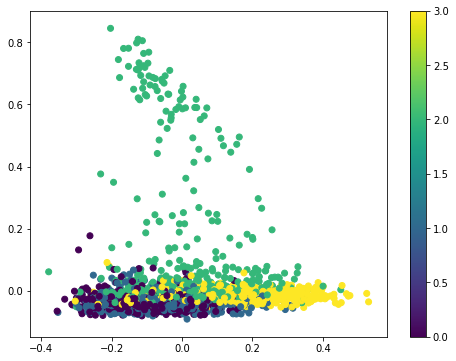

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1], c = y)
plt.colorbar()

## 4. Analysis

In [9]:
# <DONE> uncomment below. Retrieve W
W = pca.components_

In [10]:
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])

for i in range(q):
    insens_idx = np.argsort(W[i])

    print ('TOPIC ' + str(i))
    print (' '.join([invocab[w_ix] for w_ix in insens_idx[-10:]]) + '\n')

TOPIC 0
not we in god is and to that of the

TOPIC 1
n3jxp chastity cadre shameful dsl cs gordon banks geb pitt

TOPIC 2
not hell christians faith that his jesus he we god

TOPIC 3
uga georgia god ai of apple university mac edu the

